<span style="font-size: 24px; color: white;">Lab 8</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Определяем параметры стиля для черной темы
font_color = (1.0, 1.0, 1.0)
fig_color = (0.0, 0.0, 0.0)
subplot_color = (0.05, 0.05, 0.05)

line_color = (1.0, 1.0, 1.0)
gray_color = (0.5, 0.5, 0.5)
light_gray_color = (0.6, 0.6, 0.6)

point_color_1 = (0.25, 0.5, 1.0)
point_color_2 = (0.5, 0.75, 1.0)

lit_fontsize = 9
big_fontsize = 12
title_fontsize = 15

yellow_color = np.array([0.8, 0.8, 0.0])
green_color = np.array([0.25, 0.75, 0.25])
blue_color = np.array([0.0, 0.25, 1.0]) 
red_color = np.array([0.8, 0.0, 0.0])

skyblue_color = np.array([0.5, 0.75, 1.0])

# Мой стиль
black_style = {
    'axes.facecolor': subplot_color,              # Цвет фона осей
    'axes.edgecolor': font_color,                 # Цвет границ осей
    'axes.titlesize': title_fontsize,
    'axes.titleweight': 'bold',
    'axes.titlecolor': font_color,
    'axes.labelsize': title_fontsize,
    'axes.labelweight': 'bold',
    'axes.labelcolor': font_color,
    'axes.grid': True,                            # Включение сетки
    'grid.color': gray_color,                     # Цвет сетки
    'grid.alpha': 0.5,                            # Прозрачность сетки
    'xtick.color': font_color,                    # Цвет меток на оси x
    'ytick.color': font_color,                    # Цвет меток на оси y
    'figure.facecolor': fig_color,          # Цвет фона фигуры
    'figure.edgecolor': fig_color,          # Цвет границы фигуры
    'lines.linewidth': 2,
    'legend.fontsize': lit_fontsize,
    'legend.labelcolor': font_color,
    'legend.facecolor': fig_color, 
    'legend.edgecolor': fig_color,
}

# Применяем стиль
plt.style.use(black_style)

def grad_colors(n_colors, color_1, color_2):
    return [color_1 + (color_2 - color_1) * i / (n_colors - 1) for i in range(n_colors)]

1.

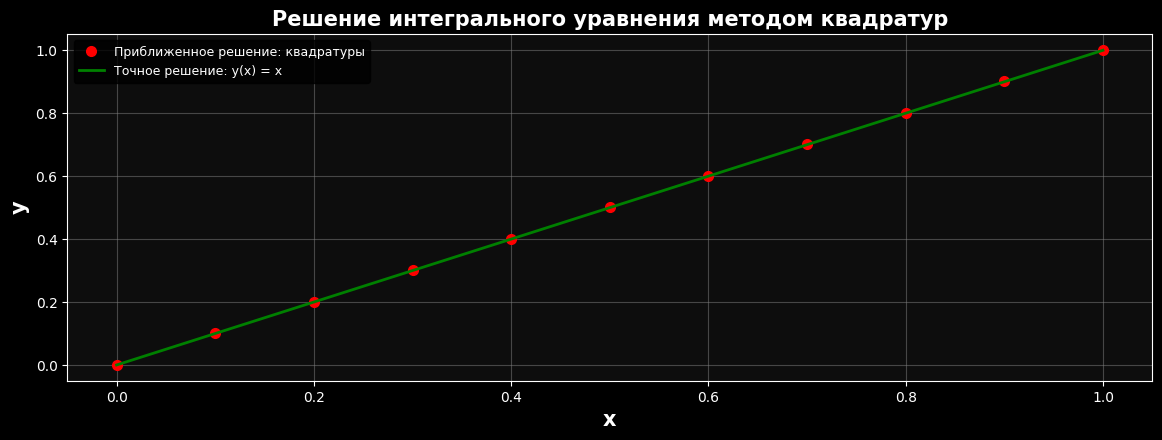

In [2]:
def Fred_2(K, f, a, b, h, lam):
    x = np.arange(a, b + h, h).reshape(-1, 1)                   # точки разбиения [a, b]
    n = len(x)                                                  # количество точек

    # Веса квадратурной формулы
    wt = 1 / 2                                                  # для левой и правой границы
    wj = 1                                                      # для внутренних точек

    # Формируем матрицу A
    A = np.zeros((n, n))
    for i in range(n):
        xi = x[i].item()  # Преобразуем x[i] в скаляр
        A[i, 0] = -h * wt * lam * K(xi, x[0].item())            # левая граница
        for j in range(1, n - 1):
            A[i, j] = -h * wj * lam * K(xi, x[j].item())        # внутренние точки
        A[i, n - 1] = -h * wt * lam * K(xi, x[n - 1].item())    # правая граница
        A[i, i] += 1                                            # диагональные элементы

    # Формируем вектор B
    B = np.zeros((n, 1))
    for i in range(n):
        B[i, 0] = f(x[i].item())                                # Преобразуем x[i] в скаляр

    # Решаем систему линейных уравнений
    y = np.linalg.solve(A, B)
    return x, y

# Параметры задачи
a, b = 0, 1
h = 0.1
lam = 1/2

# Определяем функции
K = lambda x, s: x * s
f = lambda x: (5 / 6) * x

# Решение уравнения методом квадратур
x, y_approx = Fred_2(K, f, a, b, h, lam)

# Точное решение
y_exact = x                                                                               # y(x) = x

# Построение графика
plt.figure(figsize=(14, 4.5))
plt.plot(x, y_approx, 'or', label='Приближенное решение: квадратуры', markersize=7)       # Приближенное решение
plt.plot(x, y_exact, '-g', label='Точное решение: y(x) = x')                              # Точное решение
plt.xlabel("x")
plt.ylabel("y")
plt.title("Решение интегрального уравнения методом квадратур")
plt.legend(loc='upper left')
plt.show()


2.

##### f(x) = e^x - x, потому что Козулин ошибся. У меня есть фотографии его решения, где это можно заметить:
<div style="display: flex; justify-content: space-evenly;">
  <img src="img/IMG_1.jpg" alt="фото решения" width="40%"/>
  <img src="img/IMG_2.jpg" alt="фото решения" width="40%"/>
</div>


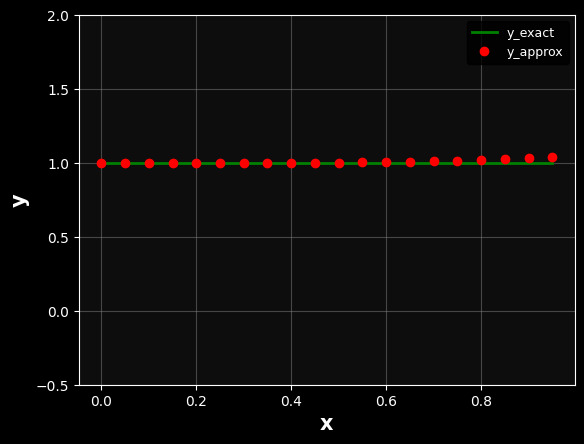

In [3]:
import scipy.integrate as integrate
import math

# Границы интервала
a = 0
b = 1
h = 0.05
Lambda = -1

# Генерация сетки
x = np.arange(a, b, h)
x = x.reshape(len(x), 1)
n = len(x)

# Задание функций
N = 20
alpha = lambda t: [t**(i+1) for i in range(1, N+1)]
beta = lambda t: [t**(i) / math.factorial(i) for i in range(1, N+1)] 

f = lambda t: np.exp(t) - t
y_exact = lambda t: 1  # Точное решение

# Функции для интегрирования
def bfun(x, i, f):
    return beta(x)[i] * f(x)

def Aijfun(x, i, j):
    return beta(x)[i] * alpha(x)[j]

# Вычисление точного решения
y = []
for i in range(n):
    y.append([])  # создаем пустую строку
    y[i].append(y_exact(x[i]))
y = np.array(y).reshape(n, 1)  # Точное решение

# Решение задачи методом вырожденных ядер
def Solve(f, t, Lambda):
    m = len(alpha(0))
    M = np.zeros((m, m))
    r = np.zeros((m, 1))

    for i in range(m):
        r[i] = integrate.quad(bfun, a, b, args=(i, f))[0]
        for j in range(m):
            M[i][j] = -Lambda * integrate.quad(Aijfun, a, b, args=(i, j))[0]

    for i in range(m):
        M[i][i] += 1

    c = np.linalg.solve(M, r)
    return Lambda * (c[0] * alpha(t)[0] + c[1] * alpha(t)[1]) + f(t)

y_approx = Solve(f, x, Lambda)

# Построение графиков
plt.plot(x, y, '-g', linewidth=2, label='y_exact')  # Точное решение
plt.plot(x, y_approx, 'or', label='y_approx')       # Приближенное решение
plt.xlabel("x")
plt.ylabel("y")
plt.legend(fontsize=12)
plt.legend(loc='upper right')
plt.ylim([-0.5, 2])
plt.show()
